### Step1: Start by importing the necessary Python libraries for data preprocessing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import LabelEncoder


### Step 2 Load the placement dataset into a Pandas Dataframe.

In [2]:
data=pd.read_csv("pre.csv")

####  Step 3 : Take a quick look at the data to understand its structure and identify any missing values or anomalies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          148 non-null    object 
 1   hsc_p           148 non-null    float64
 2   hsc_s           148 non-null    object 
 3   degree_p        148 non-null    float64
 4   degree_t        148 non-null    object 
 5   etest_p         148 non-null    float64
 6   specialisation  148 non-null    object 
 7   mba_p           148 non-null    float64
 8   salary          148 non-null    float64
dtypes: float64(5), object(4)
memory usage: 10.5+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x184e310ed50>,
 'caps': [<matplotlib.lines.Line2D at 0x184e310efd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x184e310ec10>],
 'medians': [<matplotlib.lines.Line2D at 0x184e310f250>],
 'fliers': [<matplotlib.lines.Line2D at 0x184e310f390>],
 'means': []}

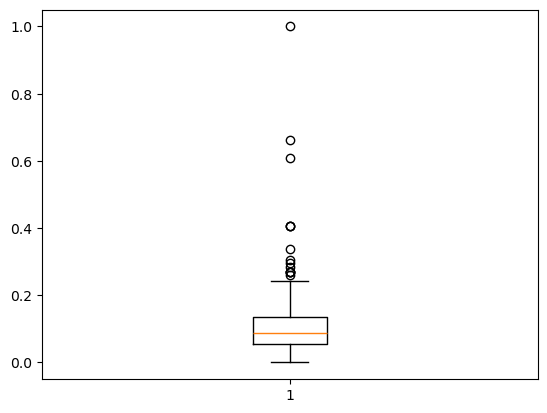

In [7]:

data.info()
plt.boxplot(data['salary'])

#### Step 4  Option 1: Identifying Outliers Using Z-Scores
The value of 3 in the context of Z-scores is often used as a threshold to identify outliers in a dataset. A Z-score represents how many standard deviations a data point is away from the mean of the dataset. Specifically:

A Z-score of 0 means the data point is exactly at the mean.
A Z-score of 1 means the data point is one standard deviation above the mean, and so on.
A Z-score of 3 corresponds to a data point being 3 standard deviations away from the mean. For a normal distribution, about 99.7% of the data points fall within 3 standard deviations of the mean (according to the 68-95-99.7 rule, which describes the spread of data in a normal distribution). Therefore, points with Z-scores greater than 3 or less than -3 are considered unusually far from the mean and are often flagged as outliers.

This threshold (Z > 3 or Z < -3) is commonly used in many statistical applications because it captures the extreme values that are rare in a normal distribution, which are typically considered to be outliers. However, the choice of threshold can vary depending on the specific application and the nature of the data.



In [21]:
columns_to_check = ['salary']
z_score = stats.zscore(data[columns_to_check])
print(z_scores)
threshold = 3
outlier_indices_u = (z_score > threshold).any(axis=1)
outlier_indices_l = (z_score <-3).any(axis=1)
print(outlier_indices_l)
print(len(outlier_indices_u))
clean=data[~outlier_indices_u]
print(clean)
clean.info()

[[-0.2002917 ]
 [-0.95183895]
 [-0.41501948]
 [ 1.46384865]
 [-0.3935467 ]
 [-0.61901088]
 [-0.30765559]
 [-0.41501948]
 [-0.75858394]
 [-0.95183895]
 [ 0.12179998]
 [-0.56532893]
 [-0.25397364]
 [ 1.12028419]
 [ 0.76598334]
 [ 0.12179998]
 [ 0.76598334]
 [-0.52238338]
 [-0.25397364]
 [ 0.65861945]
 [-0.41501948]
 [-0.11440058]
 [-0.30765559]
 [ 0.12179998]
 [ 0.33652777]
 [-0.52238338]
 [ 1.3135392 ]
 [-0.01777308]
 [ 0.12179998]
 [-0.95183895]
 [-0.90889339]
 [-0.41501948]
 [-0.95183895]
 [ 1.73225838]
 [-0.78005672]
 [-0.73711116]
 [-0.52238338]
 [ 0.76598334]
 [-0.22176447]
 [-0.25397364]
 [-0.30765559]
 [ 0.12179998]
 [-0.52238338]
 [-0.52238338]
 [-0.14660975]
 [-0.14660975]
 [-0.14660975]
 [ 0.76598334]
 [-0.52238338]
 [-0.52238338]
 [-0.75858394]
 [ 0.50831   ]
 [-0.62974727]
 [ 2.26907785]
 [-0.2002917 ]
 [-0.52238338]
 [ 0.12179998]
 [ 0.12179998]
 [ 0.12179998]
 [ 1.19543892]
 [-0.73711116]
 [-0.84447506]
 [-0.84447506]
 [ 0.12179998]
 [-0.62974727]
 [-0.30765559]
 [ 1.41016

#### Option 2:  Capping and Flooring Outliers

In [29]:
lower_limit=data[columns_to_check].quantile(0.05)
upper_limit=data[columns_to_check].quantile(0.95)
df_capped=data.copy()
df_capped[columns_to_check]=df_capped[columns_to_check].clip(lower_limit, upper_limit, axis=1)
print(df_capped)


    gender     hsc_p     hsc_s  degree_p   degree_t   etest_p specialisation  \
0        M  0.857051  Commerce  0.057143   Sci&Tech  0.104167         Mkt&HR   
1        M  0.586729   Science  0.613714   Sci&Tech  0.760417        Mkt&Fin   
2        M  0.409023      Arts  0.228571  Comm&Mgmt  0.520833        Mkt&Fin   
3        M  0.485812  Commerce  0.494286  Comm&Mgmt  0.975000        Mkt&Fin   
4        M  0.280990   Science  0.285714   Sci&Tech  0.354167        Mkt&Fin   
..     ...       ...       ...       ...        ...       ...            ...   
143      M  0.451675  Commerce  0.257143  Comm&Mgmt  0.354167        Mkt&Fin   
144      M  0.665031  Commerce  0.617143  Comm&Mgmt  0.854167        Mkt&Fin   
145      M  0.195648   Science  0.457143   Sci&Tech  0.500000        Mkt&Fin   
146      M  0.344997  Commerce  0.485714  Comm&Mgmt  0.187500        Mkt&Fin   
147      F  0.323661  Commerce  0.057143  Comm&Mgmt  0.416667         Mkt&HR   

     mba_p    salary  
0    58.80  0.09

### Step 5: Convert categorical variables into numerical format using LabelEncoder ().

In [37]:
L1=LabelEncoder ()
data['gender']=L1.fit_transform(data['gender'])
data['specialisation']=L1.fit_transform(data['specialisation'])
data['degree_t']=L1.fit_transform(data['degree_t']) 
data['hsc_s']=L1.fit_transform(data['hsc_s']) 
data.head()
                                

,gender,hsc_p,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p,salary
0,1,0.857051,1,0.057143,2,0.104167,1,58.80,0.094595
1,1,0.586729,2,0.613714,2,0.760417,0,66.28,0.000000
2,1,0.409023,0,0.228571,0,0.520833,0,57.80,0.067568
3,1,0.485812,1,0.494286,0,0.975000,0,55.50,0.304054
4,1,0.280990,2,0.285714,2,0.354167,0,62.14,0.070270


In [41]:
data=pd.read_csv("pre.csv")
categorical_cols = ['gender','hsc_s','degree_t','specialisation']
one_hot_encoded_data=pd.get_dummies(
    data,
    columns=categorical_cols,
)
print(one_hot_encoded_data)
one_hot_encoded_data.to_csv("final.csv")

        hsc_p  degree_p   etest_p  mba_p    salary  gender_F  gender_M  \
0    0.857051  0.057143  0.104167  58.80  0.094595     False      True   
1    0.586729  0.613714  0.760417  66.28  0.000000     False      True   
2    0.409023  0.228571  0.520833  57.80  0.067568     False      True   
3    0.485812  0.494286  0.975000  55.50  0.304054     False      True   
4    0.280990  0.285714  0.354167  62.14  0.070270     False      True   
..        ...       ...       ...    ...       ...       ...       ...   
143  0.451675  0.257143  0.354167  56.49  0.021622     False      True   
144  0.665031  0.617143  0.854167  74.49  0.270270     False      True   
145  0.195648  0.457143  0.500000  53.62  0.101351     False      True   
146  0.344997  0.485714  0.187500  69.72  0.128378     False      True   
147  0.323661  0.057143  0.416667  60.23  0.005405      True     False   

     hsc_s_Arts  hsc_s_Commerce  hsc_s_Science  degree_t_Comm&Mgmt  \
0         False            True          

In [43]:
data=pd.read_csv("final.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              148 non-null    int64  
 1   hsc_p                   148 non-null    float64
 2   degree_p                148 non-null    float64
 3   etest_p                 148 non-null    float64
 4   mba_p                   148 non-null    float64
 5   salary                  148 non-null    float64
 6   gender_F                148 non-null    bool   
 7   gender_M                148 non-null    bool   
 8   hsc_s_Arts              148 non-null    bool   
 9   hsc_s_Commerce          148 non-null    bool   
 10  hsc_s_Science           148 non-null    bool   
 11  degree_t_Comm&Mgmt      148 non-null    bool   
 12  degree_t_Others         148 non-null    bool   
 13  degree_t_Sci&Tech       148 non-null    bool   
 14  specialisation_Mkt&Fin  148 non-null    bo